# Chinchilla Optimal

How many tokens do we need to train a Chinchilla optimal model?

I need a compute budget. Let's say... 100 A100 hours.

https://www.harmdevries.com/post/model-size-vs-compute-overhead/
Chinchilla's third approach: loss can be modelled as function of parameter count and # of training tokens.

From Eleuther's transformer math (https://blog.eleuther.ai/transformer-math/)
GPT-NeoX gets ~180 TFLOP/s/A100 with Flash Attention.

This means we have 180e12  * 100 * 60 * 60 = 6.48e+19 flops

Chinchilla analysis indicates ~700 million parameters, 14B tokens.

My dataset: assuming 4 chars per token
- Wikipedia: 21 GB text = 21e9 chars = approx 5.25e9 tokens
- Stack: ~7 GB text = 7e9 chars = approx 1.75e9 tokens

Don't have too many tokens.
OpenWebText is 41GB, approx 10.25e9 tokens. This would be enough...

https://arxiv.org/pdf/2006.12467.pdf

Depth to Width ratio

https://arxiv.org/pdf/2203.15556.pdf

Chinchilla paper

Let's program Approach 2...

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [57]:
def calculate_optimal(flops):
    approach2 = pd.DataFrame(
        {
            "parameters": [400e6, 1e9, 10e9, 67e9, 175e9, 280e9, 520e9, 1e12, 10e12],
            "flops": [
                1.84e19,
                1.20e20,
                1.32e22,
                6.88e23,
                4.54e24,
                1.18e25,
                4.19e25,
                1.59e26,
                1.75e28,
            ],
            "tokens": [
                7.7e9,
                20.0e9,
                219.5e9,
                1.7e12,
                4.3e12,
                7.1e12,
                13.4e12,
                26.5e12,
                292.0e12,
            ],
        }
    )

    # calculate line of best fit
    tokens_coeff = np.polyfit(
        np.log(approach2["flops"]), np.log(approach2["tokens"]), 1
    )
    params_coeff = np.polyfit(
        np.log(approach2["flops"]), np.log(approach2["parameters"]), 1
    )

    optimal_tokens = np.exp(tokens_coeff[1]) * flops ** tokens_coeff[0]
    optimal_params = np.exp(params_coeff[1]) * flops ** params_coeff[0]

    print("Optimal tokens: ", optimal_tokens / 1e9, "e9")
    print("Optimal parameters: ", optimal_params / 1e9, "e9")

    plt.plot(approach2["flops"], approach2["tokens"], "o")
    plt.plot(flops, optimal_tokens, "*")
    plt.xlabel("FLOPs")
    plt.ylabel("Tokens")
    plt.title("FLOPs vs. Tokens")
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

    plt.plot(approach2["flops"], approach2["parameters"], "o")
    plt.plot(flops, optimal_params, "*")
    plt.xlabel("FLOPs")
    plt.ylabel("Params")
    plt.title("FLOPs vs. Params")
    plt.xscale("log")
    plt.yscale("log")
    plt.show()


Optimal tokens:  14.656970358453497 e9
Optimal parameters:  0.7370799732409743 e9


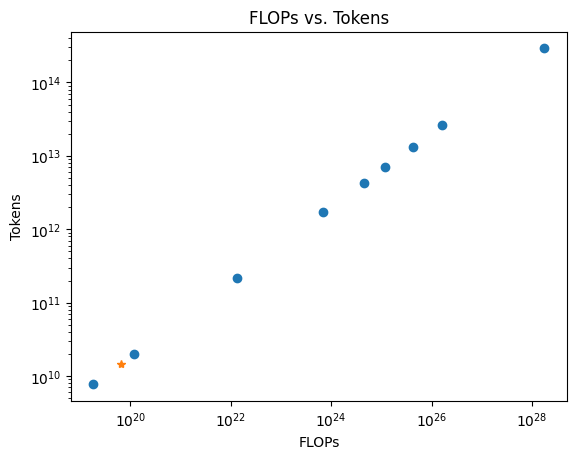

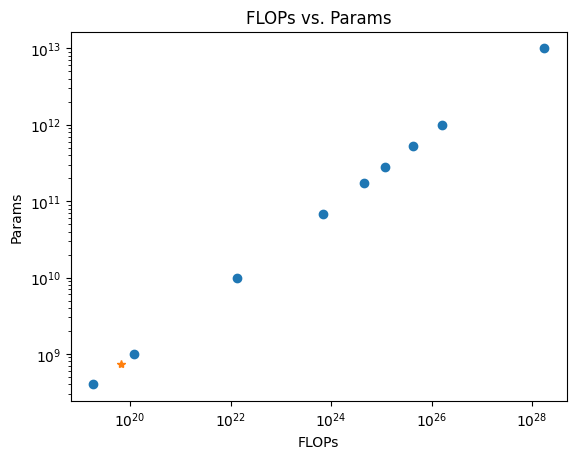

In [58]:
calculate_optimal(6.48e19)
